# Mixing in the magnetic field of the Milky Way

In [1]:
# to import gammaALPs, this cell should be only executed once after kernel restart
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from gammaALPs.core import Source, ALP, ModuleList
import numpy as np
import matplotlib.pyplot as plt

import healpy as hp
import time

fatal: No names found, cannot describe anything.


In [3]:
NSIDE = 20
pix = np.arange(hp.nside2npix(NSIDE))  # get the pixels
ll, bb = hp.pixelfunc.pix2ang(NSIDE, pix, lonlat=True)  #  get the galactic coordinates for each pixel
print (ll.shape)

(4800,)


In [4]:
model = 'base'
EGeV = np.array([1000.])  # energy
pa_in = np.diag([0., 0., 1.])  # the inital polarization matrix; a pure ALP state
pgg = np.zeros((pix.shape[0], EGeV.shape[0]))  # array to store the results
src = Source(z=0.1, ra=0., dec=0.)  # some random source for initialization

# coupling and mass at which we want to calculate the conversion probability:
g = 0.5
m = 10.

t1 = time.time()
for i, l in enumerate(ll):
    src.l = l
    src.b = bb[i]
    ml = ModuleList(ALP(m=m,g=g),
                   src,
                   pin=pa_in,  # pure ALP beam
                   EGeV=EGeV, 
                   log_level='warning'  # suppress info calls
                   )
    ml.add_propagation("GMF", 0, model='UF23', UF23_model=model)  # add the propagation module
    px, py, pa = ml.run()  # run the code
    pgg[i] = px + py  # save the result

    if i < ll.size - 1:
        del ml
        
t2 = time.time()
print ("It took", t2-t1, "seconds")

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/environs.py:1266: RuntimeWarning: divide by zero encountered in scalar divide
  self._smax = np.amin([self.__zmax/np.abs(sb),


It took 18.788222551345825 seconds


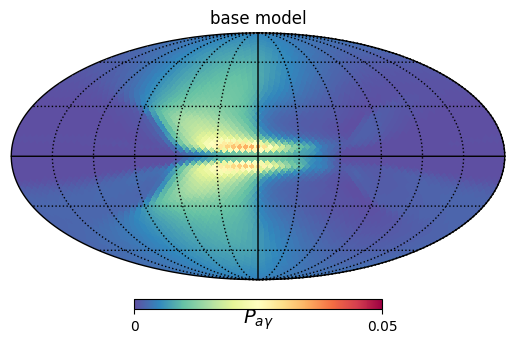

In [5]:
hpmap = hp.mollview(pgg[:,0], 
                    norm='linear',
                    title = f'{model} model', 
                    unit= r'$P_{a\gamma}$', 
                    min=0e-7,
                    max=5e-2, 
                    cmap='Spectral_r',
                    hold=True)
hp.graticule()
# plt.annotate(r"$g_{{a\gamma}} = {0:.2f}\times10^{{-11}}\,\mathrm{{GeV}}^{{-1}}$".format(ml.alp.g),
#             xy = (0.03,0.93), xycoords = 'axes fraction', fontsize = 'x-large', **effect)
plt.savefig(f'notebooks/UF23/plots/skymap_base.png')
plt.show()